<h1><center>Collected Data Sumary</center></h1>

In [2]:
#import needed libraries 
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#import needed data 
monday=pd.read_csv('data/monday.csv', parse_dates=True, index_col=0, sep=';')
tuesday=pd.read_csv('data/tuesday.csv', parse_dates=True, index_col=0, sep=';')
wednesday=pd.read_csv('data/wednesday.csv', parse_dates=True, index_col=0, sep=';')
thursday=pd.read_csv('data/thursday.csv', parse_dates=True, index_col=0, sep=';')
friday=pd.read_csv('data/friday.csv', parse_dates=True, index_col=0, sep=';')

In [4]:
#concatenate the days into a single df
week=pd.concat([monday, tuesday, wednesday, thursday, friday], axis=0)
week['weekday']=week.index.day_name()

### Calculate the total number of customers in each station

In [8]:
#table
week.groupby(['weekday', 'location']).sum()

customer_no
weekday   location             
Friday    checkout      1128782
          dairy          702669
          drinks         647451
          fruit          790835
          spices         596593
Monday    checkout      1033227
          dairy          632741
          drinks         589819
          fruit          726945
          spices         525320
Thursday  checkout      1174288
          dairy          743868
          drinks         635756
          fruit          790752
          spices         623013
Tuesday   checkout      1008920
          dairy          641961
          drinks         511589
          fruit          678957
          spices         486904
Wednesday checkout      1165112
          dairy          730353
          drinks         616173
          fruit          809245
          spices         545566

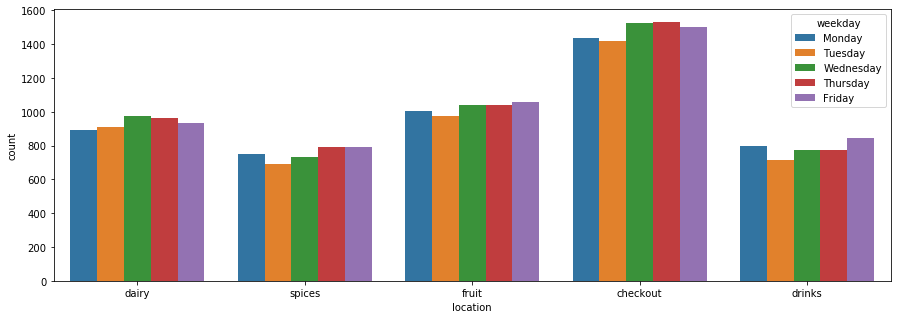

In [14]:
#graph
plt.figure(figsize=(15,5))
sns.countplot(x='location', hue='weekday', data=week)

### Calculate the total number of customers in each section over time 

In [64]:
customer_count=monday.groupby(monday.index)['location'].value_counts().unstack().fillna(0)

In [65]:
customer_count.head()

location,checkout,dairy,drinks,fruit,spices
timestamp,,,,,
2019-09-02 07:03:00,0.0,2.0,0.0,0.0,0.0
2019-09-02 07:04:00,0.0,2.0,0.0,1.0,3.0
2019-09-02 07:05:00,2.0,1.0,1.0,0.0,0.0
2019-09-02 07:06:00,2.0,2.0,1.0,2.0,1.0
2019-09-02 07:07:00,1.0,1.0,1.0,0.0,1.0


In [50]:
customer_count.tail()

location,checkout,dairy,drinks,fruit,spices
timestamp,,,,,
2019-09-06 21:46:00,0.0,0.0,1.0,4.0,0.0
2019-09-06 21:47:00,2.0,1.0,0.0,1.0,0.0
2019-09-06 21:48:00,2.0,3.0,0.0,2.0,0.0
2019-09-06 21:49:00,0.0,2.0,1.0,0.0,1.0
2019-09-06 21:50:00,2.0,1.0,1.0,1.0,1.0


### Display the number of customers at checkout over time 

Text(0.5, 1.0, "Monday's customer count")

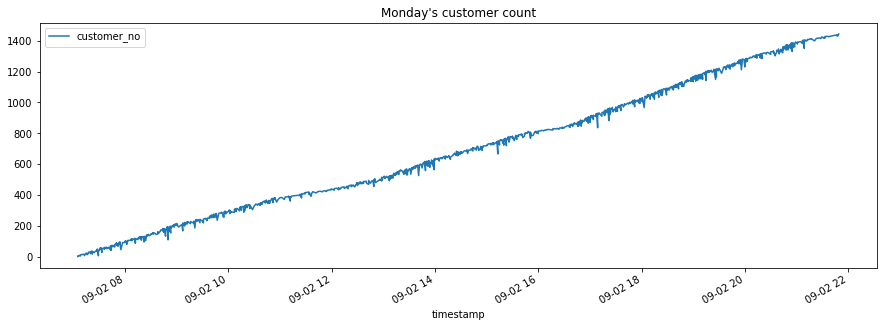

In [101]:
monday[monday['location']=='checkout'].plot(figsize=(15,5)).set_title('Monday\'s customer count')

Text(0.5, 1.0, "Tuesday's customer count")

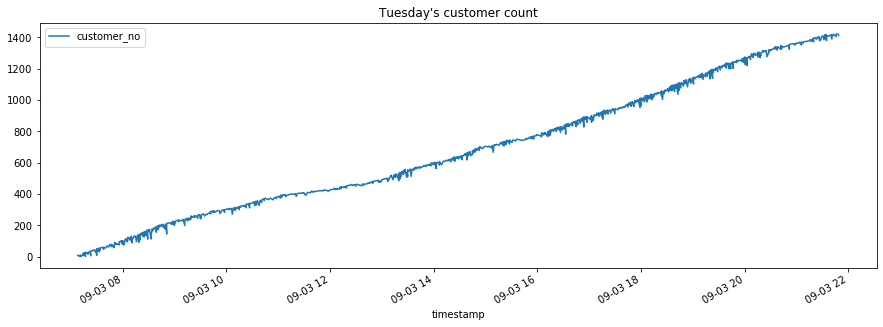

In [102]:
tuesday[tuesday['location']=='checkout'].plot(figsize=(15,5)).set_title('Tuesday\'s customer count')

Text(0.5, 1.0, "Wednesday's customer count")

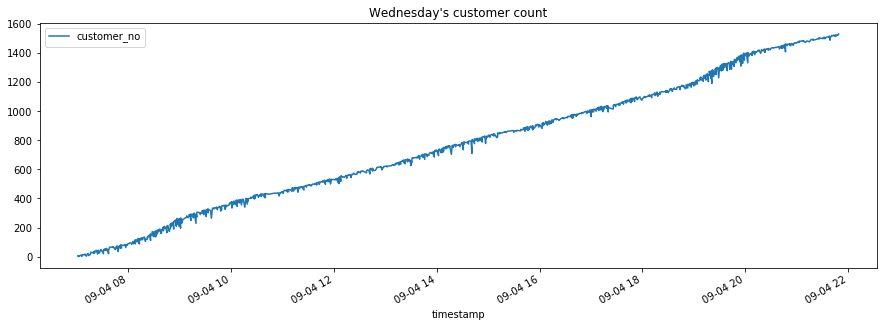

In [103]:
wednesday[wednesday['location']=='checkout'].plot(figsize=(15,5)).set_title('Wednesday\'s customer count')

Text(0.5, 1.0, "Thursday's customer count")

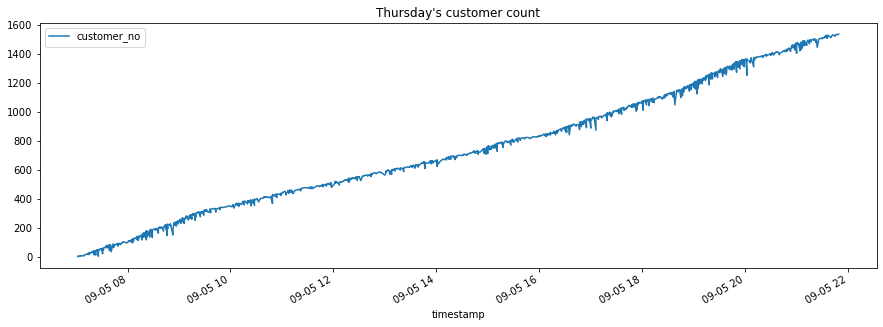

In [104]:
thursday[thursday['location']=='checkout'].plot(figsize=(15,5)).set_title('Thursday\'s customer count')

Text(0.5, 1.0, "Friday's customer count")

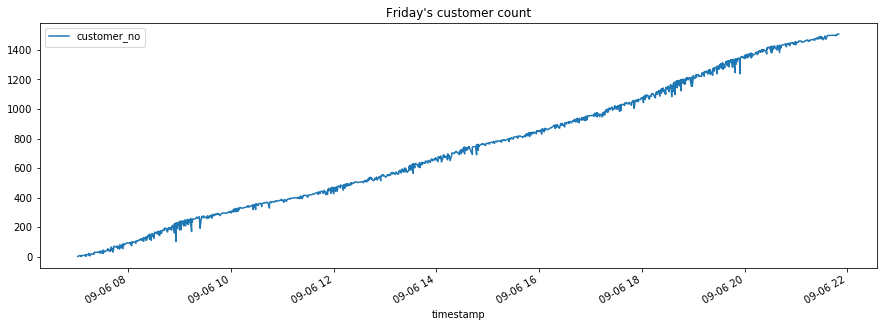

In [105]:
friday[friday['location']=='checkout'].plot(figsize=(15,5)).set_title('Friday\'s customer count')

### Calculate the total number of customers present in the supermarket over time 

In [106]:
#table 
week1=week.groupby(week.index)['location'].value_counts().unstack().fillna(0)
week1['total_customer_num']=week1['checkout']+week1['dairy']+week1['drinks']+week1['fruit']+week1['spices']
week1

location,checkout,dairy,drinks,fruit,spices,total_customer_num
timestamp,,,,,,
2019-09-02 07:03:00,0.0,2.0,0.0,0.0,0.0,2.0
2019-09-02 07:04:00,0.0,2.0,0.0,1.0,3.0,6.0
2019-09-02 07:05:00,2.0,1.0,1.0,0.0,0.0,4.0
2019-09-02 07:06:00,2.0,2.0,1.0,2.0,1.0,8.0
2019-09-02 07:07:00,1.0,1.0,1.0,0.0,1.0,4.0
...,...,...,...,...,...,...
2019-09-06 21:46:00,0.0,0.0,1.0,4.0,0.0,5.0
2019-09-06 21:47:00,2.0,1.0,0.0,1.0,0.0,4.0
2019-09-06 21:48:00,2.0,3.0,0.0,2.0,0.0,7.0


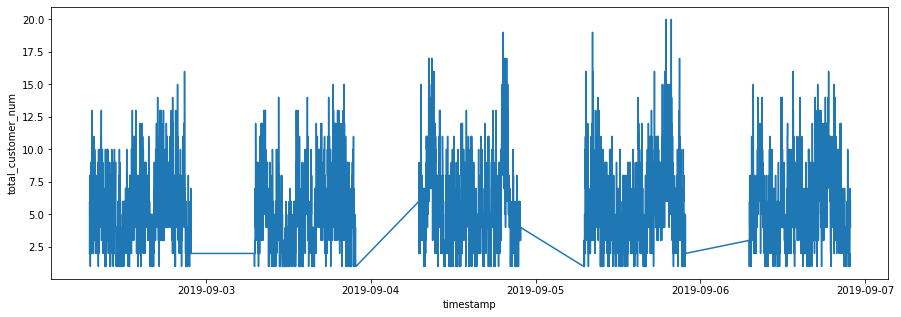

In [107]:
#graph
plt.figure(figsize=(15,5))
sns.lineplot(x=week1.index, y='total_customer_num', data=week1)

### Estimate the total revenue for each customer value

In [71]:
monday1=monday.groupby('customer_no')['location'].value_counts().unstack().fillna(0).drop('checkout', axis=1)
monday1['total_revenue_week']=(monday1['dairy']*5)+(monday1['drinks']*6)+(monday1['fruit']*4)+(monday1['spices']*3)
monday1

location,dairy,drinks,fruit,spices,total_revenue_week
customer_no,,,,,
1,1.0,0.0,0.0,0.0,5.0
2,1.0,0.0,0.0,0.0,5.0
3,1.0,0.0,0.0,0.0,5.0
4,1.0,0.0,0.0,0.0,5.0
5,0.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...
1443,1.0,0.0,1.0,0.0,9.0
1444,0.0,0.0,0.0,1.0,3.0
1445,1.0,0.0,0.0,0.0,5.0


In [72]:
#some stats on mondays revenue
monday1.describe()

location,dairy,drinks,fruit,spices,total_revenue_week
count,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000
mean,0.618521,0.550795,0.694540,0.518314,10.730477
std,0.728507,0.675606,0.716814,0.741603,8.154409
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,0.000000,0.000000,0.000000,5.000000
50%,0.000000,0.000000,1.000000,0.000000,9.000000
75%,1.000000,1.000000,1.000000,1.000000,14.000000
max,4.000000,4.000000,6.000000,5.000000,72.000000


In [73]:
tuesday1=tuesday.groupby('customer_no')['location'].value_counts().unstack().fillna(0).drop('checkout', axis=1)
tuesday1['total_revenue_week']=(tuesday1['dairy']*5)+(tuesday1['drinks']*6)+(tuesday1['fruit']*4)+(tuesday1['spices']*3)
tuesday1

location,dairy,drinks,fruit,spices,total_revenue_week
customer_no,,,,,
1,0.0,1.0,1.0,0.0,10.0
2,0.0,1.0,1.0,0.0,10.0
3,1.0,0.0,0.0,0.0,5.0
4,1.0,1.0,0.0,1.0,14.0
5,1.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...
1418,0.0,1.0,0.0,0.0,6.0
1419,0.0,0.0,1.0,0.0,4.0
1420,0.0,1.0,0.0,0.0,6.0


In [74]:
tuesday1.describe()

location,dairy,drinks,fruit,spices,total_revenue_week
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,0.640647,0.501406,0.686357,0.488045,10.421238
std,0.709526,0.686400,0.677431,0.711471,7.846373
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,0.000000,0.000000,0.000000,5.000000
50%,1.000000,0.000000,1.000000,0.000000,8.000000
75%,1.000000,1.000000,1.000000,1.000000,13.000000
max,5.000000,4.000000,4.000000,4.000000,51.000000


In [75]:
wednesday1=wednesday.groupby('customer_no')['location'].value_counts().unstack().fillna(0).drop('checkout', axis=1)
wednesday1['total_revenue_week']=(wednesday1['dairy']*5)+(wednesday1['drinks']*6)+(wednesday1['fruit']*4)+(wednesday1['spices']*3)
wednesday1

location,dairy,drinks,fruit,spices,total_revenue_week
customer_no,,,,,
1,0.0,0.0,1.0,0.0,4.0
2,1.0,0.0,0.0,1.0,8.0
3,0.0,1.0,2.0,1.0,17.0
4,0.0,0.0,1.0,0.0,4.0
5,1.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...
1527,1.0,1.0,1.0,0.0,15.0
1528,0.0,1.0,0.0,1.0,9.0
1529,1.0,0.0,1.0,1.0,12.0


In [76]:
wednesday1.describe()

location,dairy,drinks,fruit,spices,total_revenue_week
count,1531.000000,1531.000000,1531.000000,1531.000000,1531.000000
mean,0.637492,0.506205,0.681254,0.476813,10.380144
std,0.713918,0.666025,0.680471,0.722164,7.768747
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,0.000000,0.000000,0.000000,5.000000
50%,1.000000,0.000000,1.000000,0.000000,9.000000
75%,1.000000,1.000000,1.000000,1.000000,13.000000
max,4.000000,4.000000,4.000000,4.000000,52.000000


In [77]:
thursday1=thursday.groupby('customer_no')['location'].value_counts().unstack().fillna(0).drop('checkout', axis=1)
thursday1['total_revenue_week']=(thursday1['dairy']*5)+(thursday1['drinks']*6)+(thursday1['fruit']*4)+(thursday1['spices']*3)
thursday1

location,dairy,drinks,fruit,spices,total_revenue_week
customer_no,,,,,
1,0.0,1.0,0.0,0.0,6.0
2,0.0,0.0,1.0,0.0,4.0
3,2.0,2.0,2.0,3.0,39.0
4,1.0,0.0,0.0,0.0,5.0
5,1.0,1.0,1.0,0.0,15.0
...,...,...,...,...,...
1531,0.0,1.0,0.0,1.0,9.0
1532,1.0,0.0,0.0,0.0,5.0
1533,1.0,0.0,0.0,0.0,5.0


In [78]:
thursday1.describe()

location,dairy,drinks,fruit,spices,total_revenue_week
count,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000
mean,0.628664,0.505537,0.678176,0.514658,10.433225
std,0.730388,0.694410,0.697836,0.740617,8.380571
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,0.000000,0.000000,0.000000,4.000000
50%,1.000000,0.000000,1.000000,0.000000,8.000000
75%,1.000000,1.000000,1.000000,1.000000,14.000000
max,5.000000,5.000000,4.000000,5.000000,72.000000


In [79]:
friday1=friday.groupby('customer_no')['location'].value_counts().unstack().fillna(0).drop('checkout', axis=1)
friday1['total_revenue_week']=(friday1['dairy']*5)+(friday1['drinks']*6)+(friday1['fruit']*4)+(friday1['spices']*3)
friday1

location,dairy,drinks,fruit,spices,total_revenue_week
customer_no,,,,,
1,1.0,0.0,0.0,1.0,8.0
2,0.0,1.0,0.0,0.0,6.0
3,1.0,0.0,1.0,1.0,12.0
4,0.0,1.0,0.0,0.0,6.0
5,1.0,2.0,0.0,2.0,23.0
...,...,...,...,...,...
1506,1.0,0.0,0.0,0.0,5.0
1507,1.0,0.0,0.0,0.0,5.0
1508,1.0,0.0,0.0,0.0,5.0


In [80]:
friday1.describe()

location,dairy,drinks,fruit,spices,total_revenue_week
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000
mean,0.617219,0.558940,0.700000,0.523179,10.809272
std,0.709097,0.707928,0.717619,0.713725,8.134109
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,0.000000,0.000000,0.000000,5.000000
50%,1.000000,0.000000,1.000000,0.000000,9.000000
75%,1.000000,1.000000,1.000000,1.000000,14.000000
max,4.000000,4.000000,7.000000,5.000000,72.000000


### Which is the most profitable section according to the data 

In [92]:
#calc the total sum of each section per day 
monday_dairy=(monday1['dairy']*5).sum()
monday_drinks=(monday1['drinks']*6).sum()
monday_fruit=(monday1['fruit']*4).sum()
monday_spices=(monday1['spices']*3).sum()
tuesday_dairy=(tuesday1['dairy']*5).sum()
tuesday_drinks=(tuesday1['drinks']*6).sum()
tuesday_fruit=(tuesday1['fruit']*4).sum()
tuesday_spices=(tuesday1['spices']*3).sum()
wednesday_dairy=(wednesday1['dairy']*5).sum()
wednesday_drinks=(wednesday1['drinks']*6).sum()
wednesday_fruit=(wednesday1['fruit']*4).sum()
wednesday_spices=(wednesday1['spices']*3).sum()
thursday_dairy=(thursday1['dairy']*5).sum()
thursday_drinks=(thursday1['drinks']*6).sum()
thursday_fruit=(thursday1['fruit']*4).sum()
thursday_spices=(thursday1['spices']*3).sum()
friday_dairy=(friday1['dairy']*5).sum()
friday_drinks=(friday1['drinks']*6).sum()
friday_fruit=(friday1['fruit']*4).sum()
friday_spices=(friday1['spices']*3).sum()
#calculate the total sum of each section for the week
total_dairy=monday_dairy+tuesday_dairy+wednesday_dairy+thursday_dairy+friday_dairy
total_drinks=monday_drinks+tuesday_drinks+wednesday_drinks+thursday_drinks+friday_drinks
total_fruit=monday_fruit+tuesday_fruit+wednesday_fruit+thursday_fruit+friday_fruit
total_spices=monday_spices+tuesday_spices+wednesday_spices+thursday_spices+friday_spices
#createlist columns for table 
mon_num=[monday_dairy, monday_drinks, monday_fruit, monday_spices]
tues_num=[tuesday_dairy, tuesday_drinks, tuesday_fruit, tuesday_spices]
wed_num=[wednesday_dairy, wednesday_drinks, wednesday_fruit, wednesday_spices]
thur_num=[thursday_dairy, thursday_drinks, thursday_fruit, thursday_spices]
fri_num=[friday_dairy, friday_drinks, friday_fruit, friday_spices]
total_num=[total_dairy, total_drinks, total_fruit, total_spices]
profits=pd.DataFrame({'Monday':mon_num,'Tuesday':tues_num,'Wednesday':wed_num,'Thursday':thur_num,
                      'Friday':fri_num,'Total':total_num}, index=['dairy','drinks','fruit','spices'])
display(profits)

,Monday,Tuesday,Wednesday,Thursday,Friday,Total
dairy,4475.0,4555.0,4880.0,4825.0,4660.0,23395.0
drinks,4782.0,4278.0,4650.0,4656.0,5064.0,23430.0
fruit,4020.0,3904.0,4172.0,4164.0,4228.0,20488.0
spices,2250.0,2082.0,2190.0,2370.0,2370.0,11262.0


### Calculate the time each customer spent in the market 

Text(0.5, 1.0, "Monday's customers")

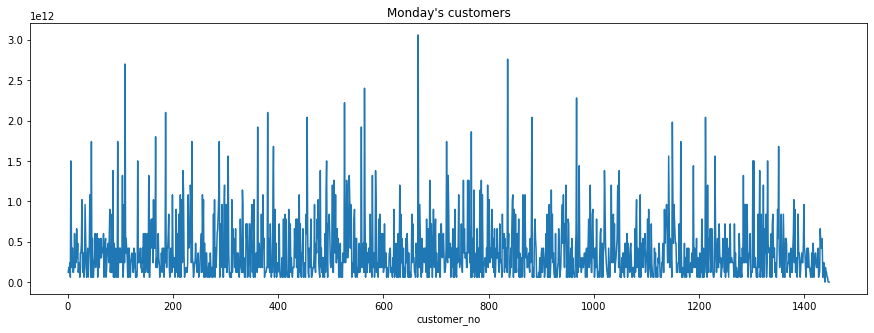

In [100]:
monday2=monday.reset_index()
monday2['time_each_station']=monday2.groupby('customer_no')['timestamp'].diff()
monday2.groupby('customer_no')['time_each_station'].sum().plot(figsize=(15,5)).set_title('Monday\'s customers')

Text(0.5, 1.0, "Tuesday's customers")

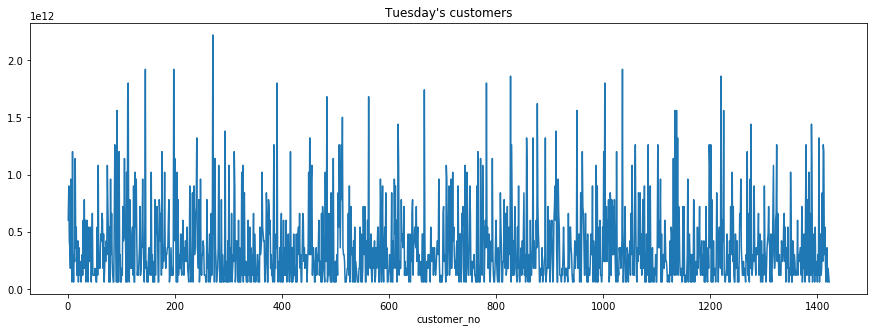

In [108]:
tuesday2=tuesday.reset_index()
tuesday2['time_each_station']=tuesday2.groupby('customer_no')['timestamp'].diff()
tuesday2.groupby('customer_no')['time_each_station'].sum().plot(figsize=(15,5)).set_title('Tuesday\'s customers')

Text(0.5, 1.0, "Wednesday's customers")

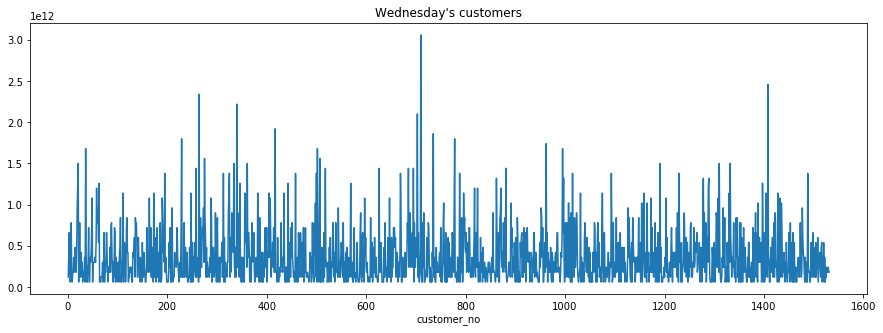

In [109]:
wednesday2=wednesday.reset_index()
wednesday2['time_each_station']=wednesday2.groupby('customer_no')['timestamp'].diff()
wednesday2.groupby('customer_no')['time_each_station'].sum().plot(figsize=(15,5)).set_title('Wednesday\'s customers')

Text(0.5, 1.0, "Thursday's customers")

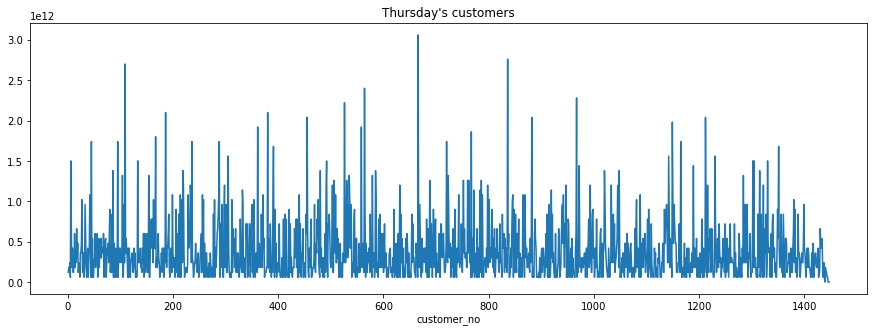

In [110]:
thursday2=monday.reset_index()
thursday2['time_each_station']=thursday2.groupby('customer_no')['timestamp'].diff()
thursday2.groupby('customer_no')['time_each_station'].sum().plot(figsize=(15,5)).set_title('Thursday\'s customers')

Text(0.5, 1.0, "Friday's customers")

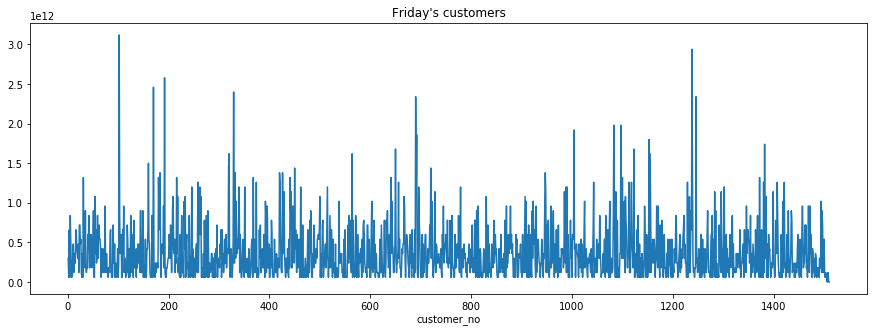

In [111]:
friday2=friday.reset_index()
friday2['time_each_station']=friday2.groupby('customer_no')['timestamp'].diff()
friday2.groupby('customer_no')['time_each_station'].sum().plot(figsize=(15,5)).set_title('Friday\'s customers')

### Business managers believe that the first section customers visit follows a different pattern compared to the following sections. Plot the distribution of customers of their first visited section versus following sections (treate all sectioned visited asfter first as following)

In [112]:
monday3=monday
monday3['first']=~monday3['customer_no'].duplicated()
monday3['following']=monday3['customer_no'].duplicated()

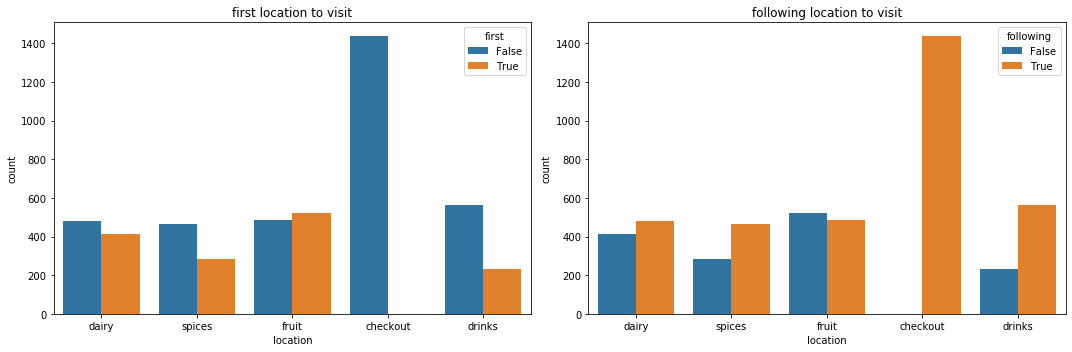

In [113]:
fig, [g1, g2]=plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='location', hue='first', data=monday3, ax=g1)
g1.set_title('first location to visit')
sns.countplot(x='location', hue='following', data=monday3, ax=g2)
g2.set_title('following location to visit')
fig.tight_layout()